In [1]:
# import necessary libraries
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import eigsh
from scipy.signal import find_peaks
from scipy.spatial import Delaunay
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import multiprocessing as mp
from sklearn import metrics
import networkx as nx
import pandas as pd
import numpy as np
import random
import csv

In [2]:
# in this code, FMI score is calculated and plotted for GrapHic, DbScan and ToMATo
nruns = 50
#nruns = 3

In [3]:
# GrapHiC

ffmi_sc = []

for r_seed in range(nruns):
    
    fmi_sc= []
    
    for i in range(14):
        graphic    = pd.read_csv('Data/graphic' + str(r_seed) + '_' + str(i) + '.csv', header=None).values.ravel()
        truelabels = pd.read_csv('Data/truelabel' + str(r_seed) + '_' + str(i) + '.csv', header = None).values.ravel()
        fmi_sc.append(metrics.fowlkes_mallows_score(truelabels, graphic))

    ffmi_sc.append(fmi_sc)

In [4]:
# DbScan

ffmi_db = []

for r_seed in range(nruns):
    
    fmi_db = []
    
    for i in range(14):
        dbscan     = pd.read_csv('Data/dbscan' + str(r_seed) + '_' + str(i) + '.csv', header=None).values.ravel()
        truelabels = pd.read_csv('Data/truelabel' + str(r_seed) + '_' + str(i) + '.csv', header = None).values.ravel()
        fmi_db.append(metrics.fowlkes_mallows_score(truelabels, dbscan))

    ffmi_db.append(fmi_db)

In [5]:
# ToMATo

ffmi_tm = []

for r_seed in range(nruns):
    
    fmi_tm = []
    
    for i in range(14):
        tomato      = pd.read_csv('Data/tomatodata' + str(r_seed) + '_' + str(i) + '.csv')['x'].values
        truelabels = pd.read_csv('Data/truelabel' + str(r_seed) + '_' + str(i) + '.csv', header = None).values.ravel()
        fmi_tm.append(metrics.fowlkes_mallows_score(truelabels, tomato))

    ffmi_tm.append(fmi_tm)

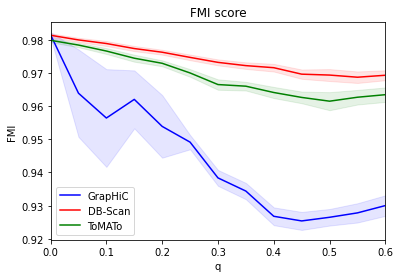

In [6]:
fmi_db_avg = np.mean(np.array(ffmi_db), axis =0)
fmi_db_sd  = np.std(np.array(ffmi_db), axis =0)/np.sqrt(50)*1.96
fmi_sc_avg = np.mean(np.array(ffmi_sc), axis =0)
fmi_sc_sd  = np.std(np.array(ffmi_sc), axis =0)/np.sqrt(50)*1.96
fmi_tm_avg = np.mean(np.array(ffmi_tm), axis =0)
fmi_tm_sd  = np.std(np.array(ffmi_tm), axis =0)/np.sqrt(50)*1.96 

x = [i*0.05 for i in range(14)]
plt.plot(x,fmi_db_avg, color ='b', label='GrapHiC')
plt.fill_between(x, (fmi_db_avg-fmi_db_sd), (fmi_db_avg+fmi_db_sd), color='b', alpha=.1)
plt.plot(x,fmi_sc_avg, color ='r', label='DB-Scan')
plt.fill_between(x, (fmi_sc_avg-fmi_sc_sd), (fmi_sc_avg+fmi_sc_sd), color='r', alpha=.1)
plt.plot(x,fmi_tm_avg, color ='g', label='ToMATo')
plt.fill_between(x, (fmi_tm_avg-fmi_tm_sd), (fmi_tm_avg+fmi_tm_sd), color='g', alpha=.1)
plt.title('FMI score')
plt.xlabel('q')
plt.ylabel('FMI')
plt.legend()
plt.xlim([0, 0.6])
plt.show()